In [210]:
import tensorflow as tf
import os

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, Dropout
from PIL import Image

import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import EarlyStopping

from keras.models import Model
from keras.preprocessing import image
import numpy as np

from tensorflow.keras.models import load_model

In [211]:
nbdir = len([iq for iq in os.scandir(TRAIN_DATA_DIR)])
print (nbdir)

10


In [212]:
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)

TRAIN_DATA_DIR = 'data/exploration/train'
TRAIN_IMAGE_SIZE = 32
TRAIN_BATCH_SIZE = 32

train_generator = image_data_generator.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='training')
 
validation_generator = image_data_generator.flow_from_directory(
    TRAIN_DATA_DIR, # same directory as training data
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='validation')

Found 4000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [240]:
model = Sequential()

model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(32,32,3))) # 5 ou 7 au dessus de 128
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3))) # 5 ou 7 au dessus de 128
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))


# model.add(Conv2D(128, kernel_size=5, activation='relu'))
# #model.add(Conv2D(128, kernel_size=5, activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
# model.add(Dense(256, activation='softmax'))

'''
model.add(Conv2D(256, kernel_size=9, activation='relu', kernel_initializer='he_uniform', padding='same'))
#model.add(Conv2D(128, kernel_size=5, activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(512, activation='relu'))
'''

#Toujours à la fin
model.add(Flatten())
model.add(Dense(nbdir, activation='softmax'))

model.summary()

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_245 (Conv2D)          (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_211 (MaxPoolin (None, 15, 15, 16)        0         
_________________________________________________________________
dense_293 (Dense)            (None, 15, 15, 32)        544       
_________________________________________________________________
conv2d_246 (Conv2D)          (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_212 (MaxPoolin (None, 6, 6, 32)          0         
_________________________________________________________________
dense_294 (Dense)            (None, 6, 6, 64)          2112      
_________________________________________________________________
conv2d_247 (Conv2D)          (None, 4, 4, 64)        

In [241]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

es_callback = EarlyStopping(monitor='val_loss', patience=8)

training = model.fit_generator(train_generator, epochs=50, callbacks=[es_callback], validation_data=validation_generator, shuffle=False)

Epoch 1/50
125/125 [==============================] - 15s 124ms/step - loss: 2.2799 - accuracy: 0.1708 - val_loss: 2.1095 - val_accuracy: 0.2590
Epoch 2/50
125/125 [==============================] - 12s 96ms/step - loss: 1.9407 - accuracy: 0.3065 - val_loss: 1.6948 - val_accuracy: 0.4140
Epoch 3/50
125/125 [==============================] - 12s 93ms/step - loss: 1.7270 - accuracy: 0.3988 - val_loss: 1.5520 - val_accuracy: 0.4730
Epoch 4/50
125/125 [==============================] - 11s 90ms/step - loss: 1.5918 - accuracy: 0.4555 - val_loss: 1.4119 - val_accuracy: 0.5140
Epoch 5/50
125/125 [==============================] - 12s 95ms/step - loss: 1.4880 - accuracy: 0.4897 - val_loss: 1.3630 - val_accuracy: 0.5320
Epoch 6/50
125/125 [==============================] - 12s 96ms/step - loss: 1.3696 - accuracy: 0.5387 - val_loss: 1.2529 - val_accuracy: 0.5920
Epoch 7/50
125/125 [==============================] - 12s 93ms/step - loss: 1.2541 - accuracy: 0.5910 - val_loss: 1.1590 - val_accuracy

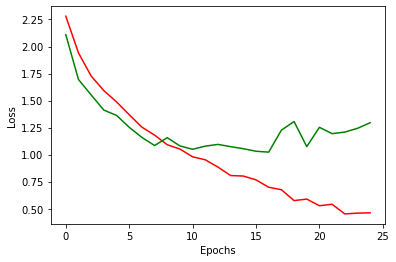

In [242]:
plt.plot(training.history['loss'], color='red', label='Training loss')
plt.plot(training.history['val_loss'],  color='green', label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

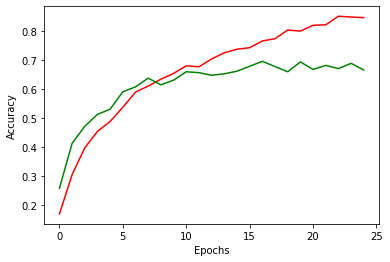

In [243]:
plt.plot(training.history['accuracy'], color='red', label='Training accuracy')
plt.plot(training.history['val_accuracy'],  color='green', label='Validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

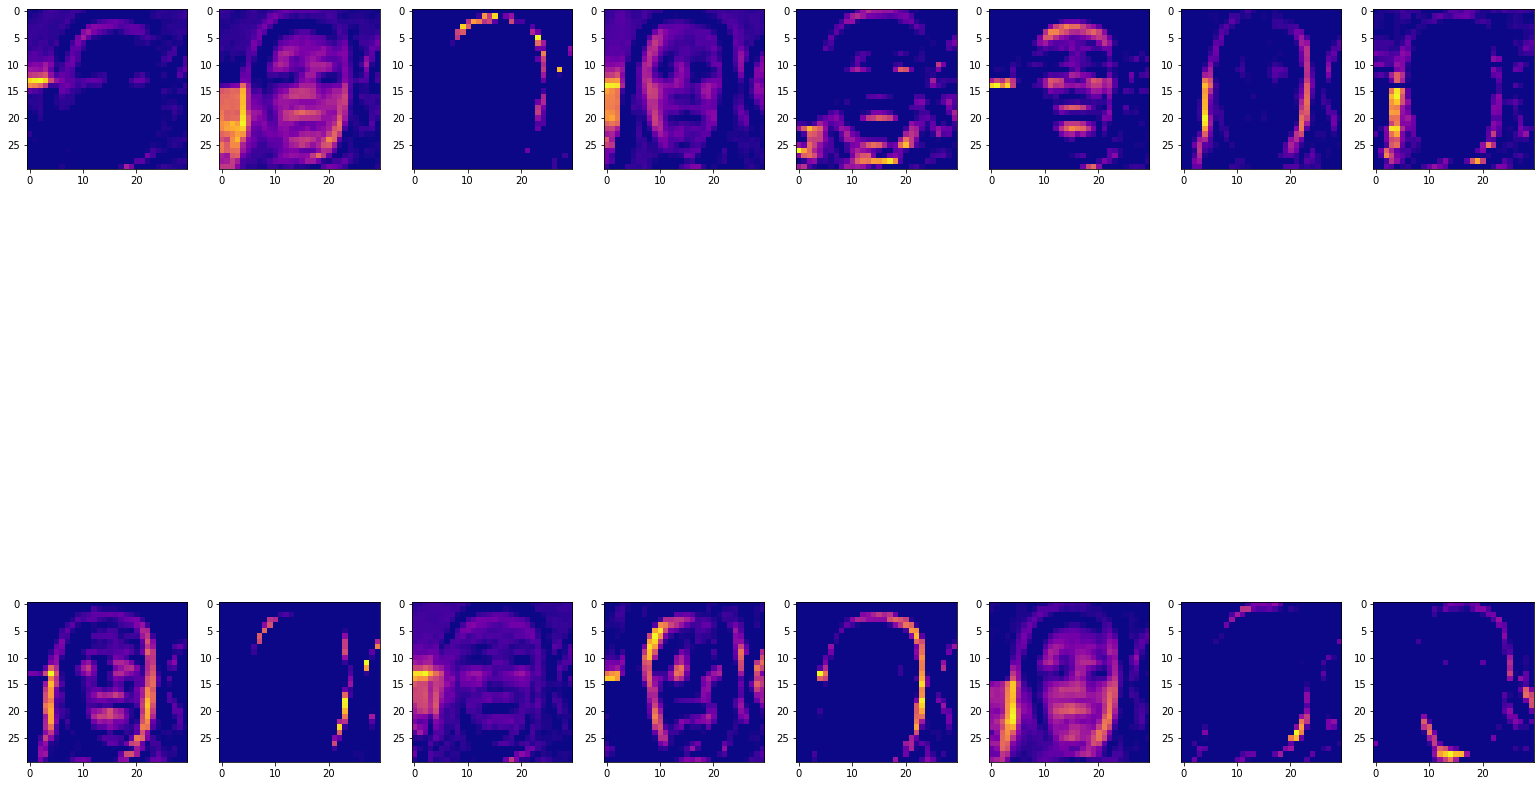

In [244]:
layer_outputs = [layer.output for layer in model.layers]

#test_image = "data/test/apple/0015.png"
#test_image = "data/test/chair/0010.png"
test_image = "data/images_test_internet/femme/femme2.jpg"

# Le chargement de l'image doit être augmenté puisque notre model prend des lots d'images.
img = image.load_img(test_image, target_size=(32,32, 1))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)

activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_arr)

def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*13.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='plasma')
            activation_index += 1

display_activation(activations, 8, 2, 0)

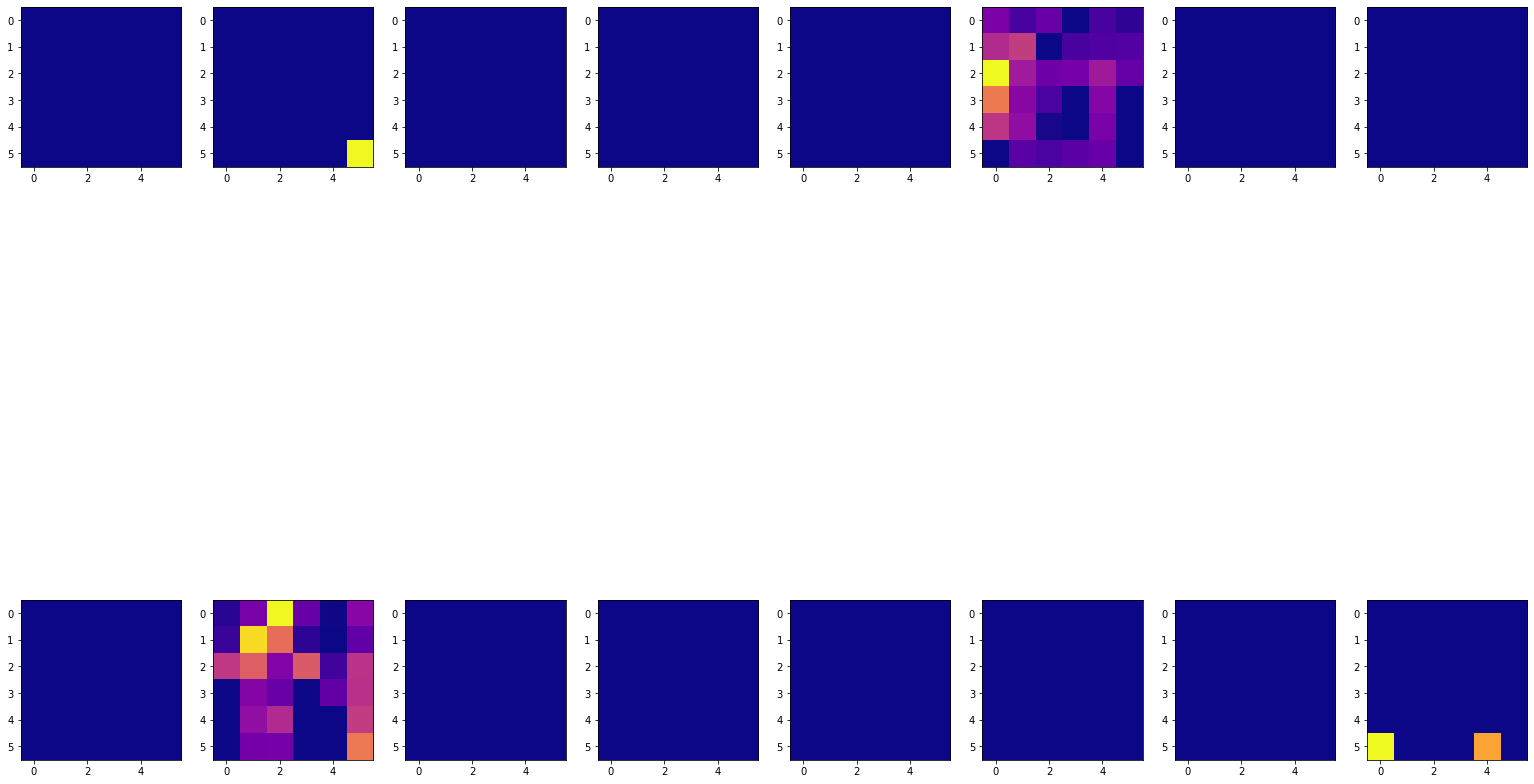

In [245]:
layer_outputs = [layer.output for layer in model.layers]

#test_image = "data/test/apple/0015.png"
#test_image = "data/test/chair/0010.png"
test_image = "data/images_test_internet/femme/femme2.jpg"

# Le chargement de l'image doit être augmenté puisque notre model prend des lots d'images.
img = image.load_img(test_image, target_size=(32,32, 1))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)

activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_arr)

def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*13.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='plasma')
            activation_index += 1

display_activation(activations, 8, 2, 4)

In [246]:
model.save('model_ultime.h5')
labels_array = os.listdir(TRAIN_DATA_DIR)

Cet objet est un(e) "plate". probs=  86.68224215507507


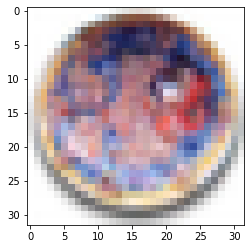

In [247]:
#choix = r'data/test/chair/0097.png'
#choix = r'data/test/elephant/0034.png'
#choix = r"data/test/apple/0043.png"
#choix = r"data/test/woman/0042.png"
#choix = r"data/test/mushroom/0052.png"
#choix = r"data/images_test_internet/femme/femme2.jpg"
#choix = r"data/test/dinosaur/0059.png"
choix = r"data/test/plate/0042.png"


test_model = load_model('model_ultime.h5')

test_image = image.load_img(choix, target_size = (32, 32))
plt.imshow(test_image)

test_image = np.expand_dims(test_image, axis = 0)
result = test_model.predict(test_image)

preds = test_model.predict_classes(test_image)
prob = test_model.predict_proba(test_image)


index = preds[0]
print(f'Cet objet est un(e) "{labels_array[index]}".', 'probs= ', prob[0][index] * 100)
